In [193]:
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,MaxPooling2D
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

In [194]:
train_labels = pd.read_csv("/content/drive/MyDrive/plate_detection/train_labels.csv")
train_labels = pd.DataFrame(train_labels)
folder_path = "/content/drive/MyDrive/plate_detection/Cars"


In [227]:
labels=[]
images = []
count = 0
target_size_image = (224,224)
for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image_test = cv2.imread(image_path)
        image_test = cv2.cvtColor(image_test , cv2.COLOR_RGB2BGR)
        h = image_test.shape[0]
        w = image_test.shape[1]
        xmin = train_labels["xmin"][count]/w
        ymin = train_labels["ymin"][count]/h
        xmax = train_labels["xmax"][count]/w
        ymax = train_labels["ymax"][count]/h

        img_resized = cv2.resize(image_test, (224,224))

        images.append(img_resized)
        labels.append((xmin,ymin,xmax,ymax))
        count += 1

In [228]:
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels, dtype='float32')

In [229]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size = 0.1, random_state = 42)

In [230]:
print(f"X_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape  = {x_test.shape}")
print(f"y_test.shape  = {y_test.shape}")

X_train.shape = (213, 224, 224, 3)
y_train.shape = (213, 4)
X_test.shape  = (24, 224, 224, 3)
y_test.shape  = (24, 4)


In [231]:
model = VGG16(weights = 'imagenet', include_top = False,input_shape = (224,224,3))

In [232]:
from keras.layers.attention.multi_head_attention import activation
for layers in model.layers:
  layers.trainable = False


flatten = Flatten()(model.output)
x = Dense(256, activation='relu')(flatten)
x = Dense(128, activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(32,activation='relu')(x)
bbox = Dense(4)(x)

modified_model = Model(inputs  = model.input, outputs = bbox)
modified_model.compile(optimizer = 'adam', loss = 'mse')
modified_model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
7/7 [==============================] - 3s 190ms/step - loss: 2.2231 - val_loss: 0.2357
Epoch 2/50
7/7 [==============================] - 1s 153ms/step - loss: 0.5576 - val_loss: 0.3518
Epoch 3/50
7/7 [==============================] - 1s 152ms/step - loss: 0.3941 - val_loss: 0.1370
Epoch 4/50
7/7 [==============================] - 1s 153ms/step - loss: 0.3013 - val_loss: 0.1378
Epoch 5/50
7/7 [==============================] - 1s 158ms/step - loss: 0.2354 - val_loss: 0.1567
Epoch 6/50
7/7 [==============================] - 1s 153ms/step - loss: 0.2006 - val_loss: 0.1237
Epoch 7/50
7/7 [==============================] - 1s 153ms/step - loss: 0.1386 - val_loss: 0.1308
Epoch 8/50
7/7 [==============================] - 1s 164ms/step - loss: 0.1054 - val_loss: 0.1246
Epoch 9/50
7/7 [==============================] - 1s 165ms/step - loss: 0.0723 - val_loss: 0.1403
Epoch 10/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0514 - val_loss: 0.1231
Epoch 11/50
7/7 [==

In [203]:
os.chdir('/content/drive/MyDrive/Cars')

In [233]:
image_test = cv2.imread('/content/drive/MyDrive/Cars/1.JPG')
image_test = cv2.cvtColor(image_test , cv2.COLOR_RGB2BGR)

In [234]:
h , w = image_test.shape[0] , image_test.shape[1]

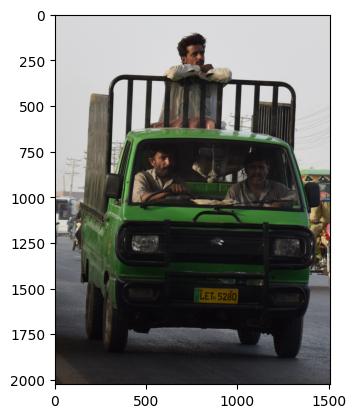

In [235]:
plt.imshow(image_test)

In [236]:
resizeImg = cv2.resize(image_test , (224,224))
cv2_immage = np.expand_dims(resizeImg,axis=0)

In [237]:
prediction = modified_model.predict(cv2_immage)
prediction

1/1 [==============================] - 0s 166ms/step


array([[-0.07900605, -1.4016978 ,  3.352066  ,  3.366126  ]],
      dtype=float32)

In [167]:
cv2_immage.shape

(1, 224, 224, 3)

In [225]:
xmin = int(prediction[0][0]*w)
ymin = int(prediction[0][1]*h)
xmax = int(prediction[0][2]*w)
ymax = int(prediction[0][3]*h)

In [216]:
print(xmin, ymin , xmax , ymax)

492 750 1117 899


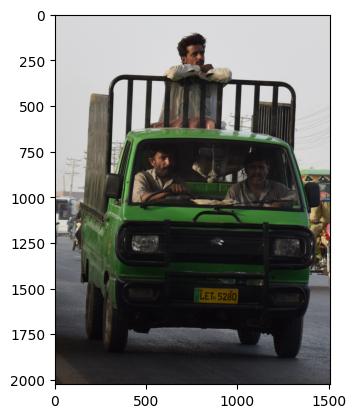

In [226]:
cv2.rectangle(image_test , (xmin,ymin) , (xmax , ymax) , (255,0,0) , 2 )

plt.imshow(image_test)
plt.show()